In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import spacy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [50]:
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
submission_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [51]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [52]:
df_1 = df

In [53]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [54]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [55]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [56]:
submission_df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [57]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [58]:
disaster_tweets = df[df['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [59]:
disaster_tweets.values[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [60]:
non_disaster_tweets = df[df['target']==1]['text']

In [61]:
non_disaster_tweets.values[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [62]:
def clean_data(tweet):
    tweet = re.sub("RT @[\w]*:", "", tweet)
    tweet = re.sub("@[\w]*", "", tweet)
    tweet = re.sub("https://[A-Za-z0-9./]", "", tweet)
    tweet = re.sub("\n", "", tweet)
    tweet = re.sub("&amp", "", tweet)
    tweet = re.sub("#", "", tweet)
    tweet = re.sub(r"[^\w]", ' ', tweet )
    return tweet

In [63]:
df['text'] = df['text'].apply(lambda x: clean_data(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_data(x))

In [64]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [65]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

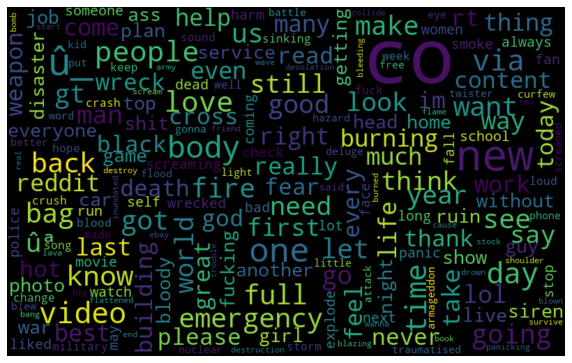

In [66]:
fake_data = df[df["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

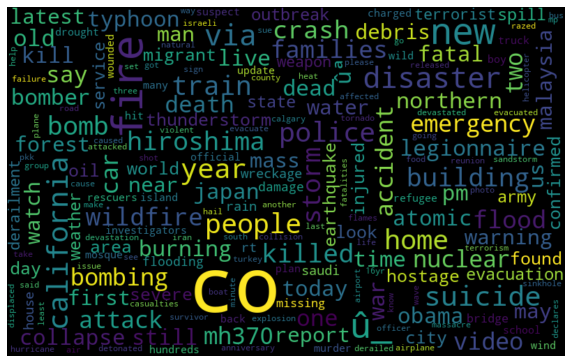

In [67]:
fake_data = df[df["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df['text_tokens'] = df['text'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,keyword,location,text,target,text_tokens
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,residents asked shelter place notified officer...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1,"[13, 000, people, receive, wildfires, evacuati..."
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [69]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df['text_tokens_lemma'] = df['text_tokens'].apply(lambda x: word_lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,keyword,location,text,target,text_tokens,text_tokens_lemma
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,residents asked shelter place notified officer...,1,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1,"[13, 000, people, receive, wildfires, evacuati...","[13, 000, people, receive, wildfire, evacuatio..."
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [70]:
def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text
nltk.download('averaged_perceptron_tagger')
df['text_tokens_pos_tagged'] = df['text_tokens'].apply(lambda x: word_pos_tagger(x))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,keyword,location,text,target,text_tokens,text_tokens_lemma,text_tokens_pos_tagged
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,residents asked shelter place notified officer...,1,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1,"[13, 000, people, receive, wildfires, evacuati...","[13, 000, people, receive, wildfire, evacuatio...","[(13, CD), (000, CD), (people, NNS), (receive,..."
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


In [71]:
df['text_1']= df['text_tokens_pos_tagged']

In [72]:
df

,id,keyword,location,text,target,text_tokens,text_tokens_lemma,text_tokens_pos_tagged,text_1
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,residents asked shelter place notified officer...,1,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1,"[13, 000, people, receive, wildfires, evacuati...","[13, 000, people, receive, wildfire, evacuatio...","[(13, CD), (000, CD), (people, NNS), (receive,...","[(13, CD), (000, CD), (people, NNS), (receive,..."
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1,"[two, giant, cranes, holding, bridge, collapse...","[two, giant, crane, holding, bridge, collapse,...","[(two, CD), (giant, JJ), (cranes, NNS), (holdi...","[(two, CD), (giant, JJ), (cranes, NNS), (holdi..."
7609,10870,NaN,NaN,control wild fires california even northern pa...,1,"[control, wild, fires, california, even, north...","[control, wild, fire, california, even, northe...","[(control, NN), (wild, JJ), (fires, NNS), (cal...","[(control, NN), (wild, JJ), (fires, NNS), (cal..."
7610,10871,NaN,NaN,m1 94 01 04 utc 5km volcano hawaii http co zdt...,1,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii, ht...","[m1, 94, 01, 04, utc, 5km, volcano, hawaii, ht...","[(m1, RB), (94, CD), (01, CD), (04, CD), (utc,...","[(m1, RB), (94, CD), (01, CD), (04, CD), (utc,..."
7611,10872,NaN,NaN,police investigating e bike collided car littl...,1,"[police, investigating, e, bike, collided, car...","[police, investigating, e, bike, collided, car...","[(police, NNS), (investigating, VBG), (e, NN),...","[(police, NNS), (investigating, VBG), (e, NN),..."


In [74]:
from nltk.stem.porter import *
corpus  = []
pstem = PorterStemmer()
for i in range(df_1['text'].shape[0]):
    #Remove unwanted words
    text = re.sub("[^a-zA-Z]", ' ', df_1['text'][i])
    #Transform words to lowercase
    text = text.lower()
    text = text.split()
    #Remove stopwords then Stemming it
    text = [pstem.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    #Append cleaned tweet to corpus
    corpus.append(text)

In [75]:
#Create dictionary 
uniqueWords = {}
for text in corpus:
    for word in text.split():
        if(word in uniqueWords.keys()):
            uniqueWords[word] += 1
        else:
            uniqueWords[word] = 1
            
#Convert dictionary to dataFrame
uniqueWords = pd.DataFrame.from_dict(uniqueWords,orient='index',columns=['WordFrequency'])
uniqueWords.sort_values(by=['WordFrequency'], inplace=True, ascending=False)
print("Number of records in Unique Words Data frame are {}".format(len(uniqueWords)))
uniqueWords.head(10)

Number of records in Unique Words Data frame are 16940


,WordFrequency
co,4746
http,4267
like,410
fire,360
get,311
bomb,237
new,227
via,220
u,216
go,210


In [76]:
#Get Maximum,Minimum and Mean occurance of a word 
print("Maximum Occurance of a word is {} times".format(uniqueWords['WordFrequency'].max()))
print("Minimum Occurance of a word is {} times".format(uniqueWords['WordFrequency'].min()))
print("Mean Occurance of a word is {} times".format(uniqueWords['WordFrequency'].mean()))

Maximum Occurance of a word is 4746 times
Minimum Occurance of a word is 1 times
Mean Occurance of a word is 4.959386068476977 times


In [79]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = len(uniqueWords))
#Create Bag of Words Model , here X represent bag of words
X = cv.fit_transform(corpus).todense()
y = df_1['target'].values

In [80]:
#Split the train data set to train and test data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2020)

In [83]:
from sklearn.metrics import confusion_matrix
# Fitting Decision Tree Models to the Training set
classifier_dt = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=55)
classifier_dt.fit(X_train, y_train)
# Predicting the Train data set results
y_pred_dt = classifier_dt.predict(X_test)
# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[698, 151],
       [201, 473]])

In [85]:
from sklearn.metrics import f1_score
#Calculating Model Accuracy
print('DecisionTree Model Accuracy Score for Train Data set is {}'.format(classifier_dt.score(X_train, y_train)))
print('DecisionTree Model Accuracy Score for Test Data set is {}'.format(classifier_dt.score(X_test, y_test)))
print('DecisionTree Model F1 Score is {}'.format(f1_score(y_test, y_pred_dt)))

DecisionTree Model Accuracy Score for Train Data set is 0.9952380952380953
DecisionTree Model Accuracy Score for Test Data set is 0.7688772160210111
DecisionTree Model F1 Score is 0.7288135593220337
